<h1><b>MNIST Dataset</b></h1>

<h2><b>Load Libraries</b></h2>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets.mnist import load_data
import matplotlib.pyplot as plt

<h2><b>Load Train Data</b></h2>
<h2><b>Download dataset via this link <a>https://drive.google.com/drive/folders/1LLeYjmjh7JfKPAqNg8lkQ5XVU7MxKTDf?usp=sharing</a></b></h2>

In [3]:
train_data = pd.read_csv('mnist_train.csv')
y_train = train_data['label'].to_numpy()
x_train = train_data.iloc[:,1:].to_numpy()
x_train = x_train.reshape(x_train.shape[0],28,28)
print('Shape of x_train:',x_train.shape)
print('Shape of y_train:',y_train.shape)

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)


<h2><b>Load Test Data</b></h2>

In [4]:
test_data = pd.read_csv('mnist_test.csv')
y_test = test_data['label'].to_numpy()
x_test = test_data.iloc[:,1:].to_numpy()
x_test = x_test.reshape(x_test.shape[0],28,28)
print('Shape of x_test:',x_test.shape)
print('Shape of y_test:',y_test.shape)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


<h2><b>Data Visualization</b></h2>

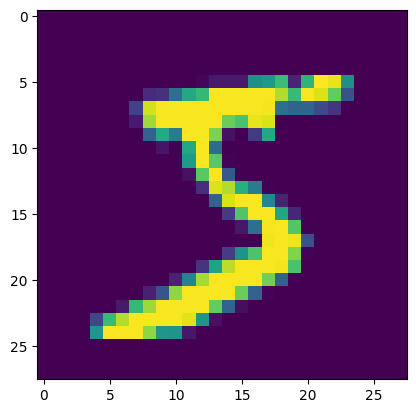

In [5]:
plt.imshow(x_train[0])

<h2><b>Normalize Data</b></h2>

In [6]:
# np.max(x_train) = 255
x_train = x_train/(np.max(x_train))
x_test = x_test/(np.max(x_test))

<h2><b>Create Model</b></h2>

In [7]:
from keras import Sequential
from keras.layers import Dense, Flatten
model = Sequential(
    [
        Flatten(input_shape=[x_train.shape[1],x_train.shape[2]]),
        Dense(100,activation='relu'),
        Dense(75,activation='relu'),
        Dense(10,activation='softmax'),
    ]
)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 75)                7575      
                                                                 
 dense_2 (Dense)             (None, 10)                760       
                                                                 
Total params: 86,835
Trainable params: 86,835
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.layers

In [10]:
w, b = model.layers[1].get_weights()
print('W:',w)
print('Bias:',b)

W: [[-0.05876911  0.06316464 -0.04838591 ...  0.07308064  0.07587463
  -0.03645633]
 [-0.03688443  0.06137952 -0.06218623 ...  0.0413382   0.06724888
   0.03589325]
 [-0.08129111  0.07473658 -0.02608892 ...  0.07993558 -0.06562054
  -0.07498688]
 ...
 [-0.01618828 -0.01752565  0.05576155 ... -0.05025447  0.05067915
  -0.08091323]
 [-0.04644029  0.03689842  0.05529121 ... -0.04433221  0.02939424
   0.05567192]
 [ 0.00871512  0.02102096  0.05009763 ... -0.07871427  0.05956508
  -0.05371151]]
Bias: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


<h2><b>Compile Model</b></h2>

In [11]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

<h2><b>Fit Model</b></h2>

In [12]:
history = model.fit(
    x_train,
    y_train,
    epochs=60,
    validation_split=0.2
)

Epoch 1/60
1500/1500 [==============================] - 3s 1ms/step - loss: 0.7615 - accuracy: 0.7991 - val_loss: 0.3528 - val_accuracy: 0.9021
Epoch 2/60
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3347 - accuracy: 0.9040 - val_loss: 0.2840 - val_accuracy: 0.9203
Epoch 3/60
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2799 - accuracy: 0.9194 - val_loss: 0.2540 - val_accuracy: 0.9299
Epoch 4/60
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2447 - accuracy: 0.9300 - val_loss: 0.2188 - val_accuracy: 0.9388
Epoch 5/60
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2176 - accuracy: 0.9374 - val_loss: 0.2017 - val_accuracy: 0.9445
Epoch 6/60
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1968 - accuracy: 0.9437 - val_loss: 0.1843 - val_accuracy: 0.9498
Epoch 7/60
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1790 - accuracy: 0.9486 - val_loss: 0.1779 - val_accuracy:

In [13]:
print(history.history)

{'loss': [0.7615062594413757, 0.33471083641052246, 0.27992820739746094, 0.24471329152584076, 0.21755358576774597, 0.19680240750312805, 0.1790228933095932, 0.16459326446056366, 0.1522500365972519, 0.14151082932949066, 0.13131269812583923, 0.12294235080480576, 0.11480208486318588, 0.10807020962238312, 0.10144583880901337, 0.09599140286445618, 0.09079145640134811, 0.08590543270111084, 0.08145986497402191, 0.07728017866611481, 0.07373008877038956, 0.07022222876548767, 0.06645049899816513, 0.06355466693639755, 0.060806065797805786, 0.05784737318754196, 0.055664774030447006, 0.05327079817652702, 0.05099787935614586, 0.048648517578840256, 0.046546027064323425, 0.044629089534282684, 0.042824823409318924, 0.04098297655582428, 0.03945065289735794, 0.03775554522871971, 0.03626803681254387, 0.03482694923877716, 0.033257611095905304, 0.03195488452911377, 0.030765127390623093, 0.029455848038196564, 0.02849745936691761, 0.027300598099827766, 0.0263120848685503, 0.02524595893919468, 0.0244964212179183

<h2><b>Visualize Error And Accuracy</b></h2>

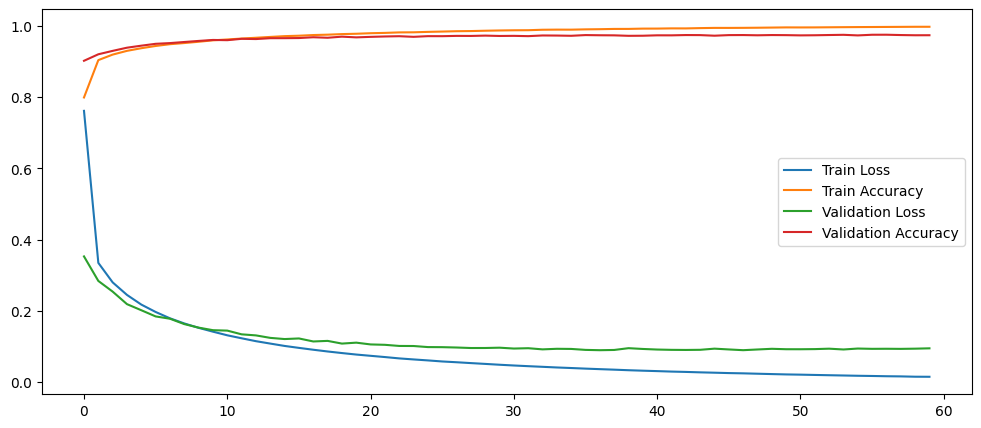

In [14]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history["loss"], label="Train Loss")
ax.plot(history.history["accuracy"], label="Train Accuracy")
ax.plot(history.history["val_loss"], label="Validation Loss")
ax.plot(history.history["val_accuracy"], label="Validation Accuracy")
ax.legend()

<h2><b>Evaluate Model</b></h2>

In [15]:
model.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.0793 - accuracy: 0.9768


[0.0792945921421051, 0.9768000245094299]

1/1 [==============================] - 0s 19ms/step
Shape of prediction: (1, 10)
Prediction: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


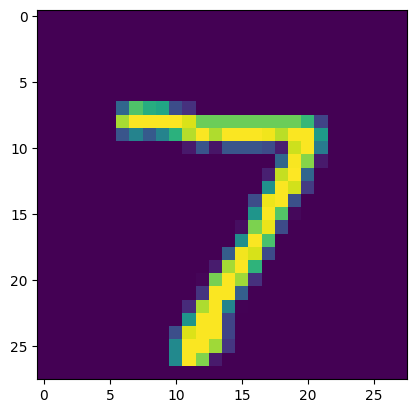

In [25]:
# fig 1
plt.imshow(x_test[0])
pred = model.predict(x_test[0:1,:,:]).round(3)
print('Shape of prediction:',pred.shape)
print('Prediction:',pred)